### Importing all the required libraries

In [1]:
import pandas as pd
import sklearn as sk
import seaborn as sn
import torch
import torch.nn.init as init
from torch import nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Reading and preprocessing the daatset

In [2]:
df= pd.read_csv("dataset.csv")

### Shape of the dataset

In [3]:
df.shape

(766, 8)

### Printing the names of the columns

In [4]:
df.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'target'], dtype='object')

### Checking for Null values

In [5]:
df = df.dropna()
print(df)

     f1   f2  f3  f4   f5    f6     f7  target
0     6  148  72  35    0  33.6  0.627       1
1     1   85  66  29    0  26.6  0.351       0
2     8  183  64   0    0  23.3  0.672       1
3     1   89  66  23   94  28.1  0.167       0
4     0  137  40  35  168  43.1  2.288       1
..   ..  ...  ..  ..  ...   ...    ...     ...
761   9   89  62   0    0  22.5      e       0
762  10  101  76  48  180     d  0.171       0
763   2  122  70  27    b  36.8   0.34       0
764   c  121  72  23  112  26.2  0.245       0
765   1  126  60   a    0  30.1  0.349       1

[766 rows x 8 columns]


### printing datatypes of the features

In [6]:
df.dtypes

f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
target     int64
dtype: object

### Removing the Categorical data

In [7]:
cols = df.select_dtypes(include=['object']).columns
values=['c','f','a','b','d','e']
i=0
for col in cols:
    df = df.loc[~df[col].str.contains(values[i])]
    i=i+1
print(df)

    f1   f2  f3  f4   f5    f6     f7  target
0    6  148  72  35    0  33.6  0.627       1
1    1   85  66  29    0  26.6  0.351       0
2    8  183  64   0    0  23.3  0.672       1
3    1   89  66  23   94  28.1  0.167       0
4    0  137  40  35  168  43.1  2.288       1
..  ..  ...  ..  ..  ...   ...    ...     ...
755  1  128  88  39  110  36.5  1.057       1
756  7  137  90  41    0    32  0.391       0
757  0  123  72   0    0  36.3  0.258       1
758  1  106  76   0    0  37.5  0.197       0
759  6  190  92   0    0  35.5  0.278       1

[760 rows x 8 columns]


### Printing the shape after dropping the unwanted rows

In [8]:
df.shape

(760, 8)

### Changing the datatype of the features

In [9]:
df = df.astype({'f1': int, 'f2': int, 'f4': int, 'f5': int, 'f6': float, 'f7': float})
df.dtypes

f1          int32
f2          int32
f3          int64
f4          int32
f5          int32
f6        float64
f7        float64
target      int64
dtype: object

### Normalising the Dataset using standard Scaler

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['target']))
ndf = pd.DataFrame(scaled_data, columns=df.drop(columns=['target']).columns)
ndf['target'] = df['target']
ndf.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,7.600000e+02,7.600000e+02,7.600000e+02,7.600000e+02,7.600000e+02,7.600000e+02,7.600000e+02,760.000000
mean,-7.756953e-17,2.278879e-17,-2.836912e-16,6.719771e-17,6.719771e-18,-1.623701e-16,1.615667e-16,0.350000
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,0.477284
min,-1.140270e+00,-3.780041e+00,-3.556770e+00,-1.285961e+00,-6.946361e-01,-4.053275e+00,-1.190303e+00,0.000000
25%,-8.428760e-01,-6.865065e-01,-2.891809e-01,-1.285961e+00,-6.946361e-01,-5.951826e-01,-6.911439e-01,0.000000
50%,-2.480889e-01,-1.240456e-01,1.482128e-01,1.562691e-01,-3.829623e-01,1.666711e-04,-2.943761e-01,0.000000
75%,6.440919e-01,6.259022e-01,5.598776e-01,7.206199e-01,4.157018e-01,5.828490e-01,4.645270e-01,1.000000
max,3.915421e+00,2.438276e+00,2.721117e+00,4.921898e+00,6.629698e+00,4.446286e+00,5.862677e+00,1.000000


### Splitting the data into training and testing

In [11]:
X, y = ndf.drop(columns='target'),ndf['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Data Visualisation

### Heatmap for Correlation matrix

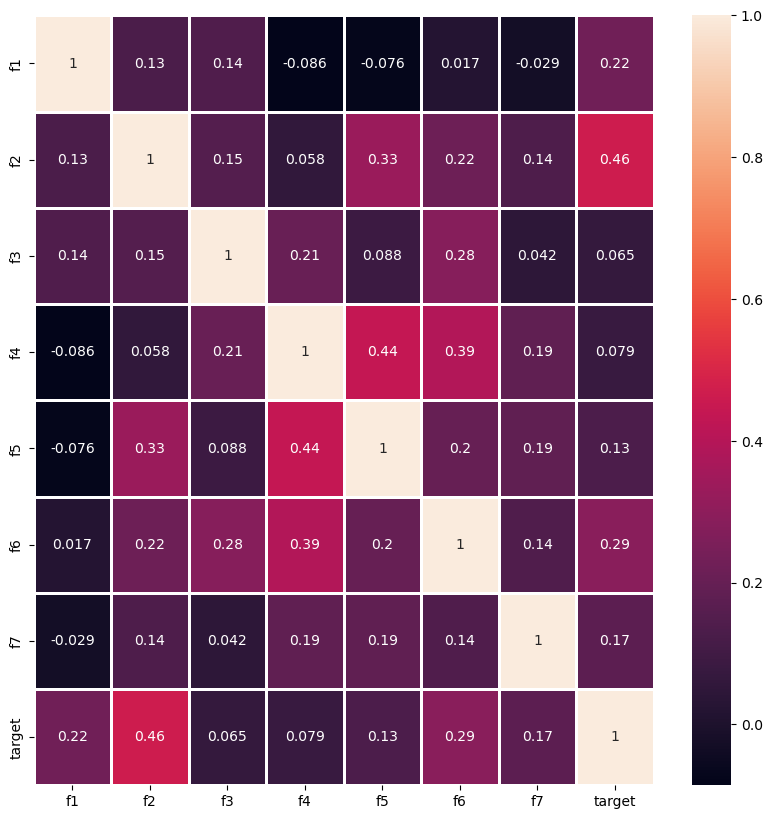

In [12]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(corr_matrix, annot=True, linewidth=1)
plt.show()

### Boxplot

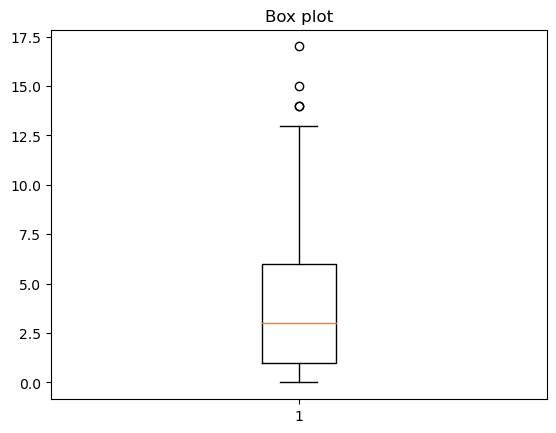

In [13]:
plt.boxplot(df["f1"])
plt.title("Box plot")
plt.show()

### Violin Plot

C:\Users\Preethi Abhilasha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


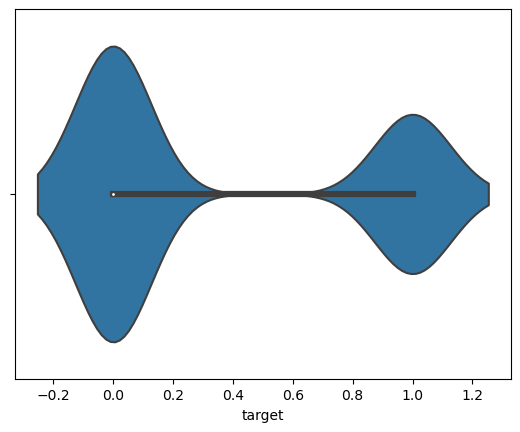

In [14]:
fig, axes = plt.subplots()
sn.violinplot('target', data=df, ax = axes)
plt.show()

### Defining the Neural Network

In [15]:
class NeuralNetwork(nn.Module):
    def __init__(self,dropout):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
        nn.Linear(7, 64),
        nn.ReLU(),
        nn.Dropout(p=dropout),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Dropout(p=dropout),
        nn.Linear(32, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

### Training and Validating the model

In [16]:
def training(X_train,y_train,X_test,y_test,epochs=150,batch_size=15,optimizer='SGD'):

    train_data = torch.utils.data.TensorDataset(torch.Tensor(X_train.values), torch.Tensor(y_train.values).unsqueeze(1))
    val_data = torch.utils.data.TensorDataset(torch.Tensor(X_test.values), torch.Tensor(y_test.values).unsqueeze(1))
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)

    lossFunc = torch.nn.BCELoss()
    
    if optimizer == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    elif optimizer == 'RMSprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
    elif optimizer == 'Adagrad':
        optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)
    else:
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    list_validation_loss = []
    list_training_loss = []
    list_train_acc = []
    list_valid_acc = []
    for epoch in range(epochs):
        train_loss=0
        train_acc=0
        val_loss=0
        val_acc=0
        model.train()
        for b_id,data in enumerate(train_loader):
            features,output = data
            optimizer.zero_grad()
            predictions = model(features)
            loss = lossFunc(predictions, output)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_acc += (predictions.round() == output).float().sum().item()

        # Evaluate the model on the validation data
        model.eval()
        with torch.no_grad():
            for b_id, data in enumerate(val_loader):
                features,output = data
                predictions = model(features)
                loss = lossFunc(predictions, output)
                val_loss += loss.item()
                val_acc += (predictions.round() == output).float().sum().item()

        epoch_train_loss = train_loss/len(train_loader)
        epoch_train_acc = train_acc/len(train_data)
        epoch_valid_loss = val_loss/len(val_loader)
        epoch_valid_acc = val_acc/len(val_data)
        
        list_validation_loss.append(epoch_valid_loss)
        list_training_loss.append(epoch_train_loss)
        list_train_acc.append(epoch_train_acc)
        list_valid_acc.append(epoch_valid_acc)
        if (epoch+1)%10 ==0:
            print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'
          .format(epoch+1, epochs, epoch_train_loss, epoch_train_acc, epoch_valid_loss, epoch_valid_acc))

    return list_validation_loss,list_training_loss,list_train_acc,list_valid_acc

### Testing the model on Test dataset

In [17]:
def testing(X_test,y_test,batch_size):

    test_data = torch.utils.data.TensorDataset(torch.Tensor(X_test.values), torch.Tensor(y_test.values).unsqueeze(1))
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

    lossFunc = torch.nn.BCELoss()
    test_loss = 0
    test_acc = 0
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            features,output = data
            predictions = model(features)
            loss = lossFunc(predictions, output)
            test_loss += loss.item()
            test_acc += (predictions.round() == output).float().sum().item()
    
    final_test_loss = test_loss/len(test_loader)
    final_test_acc = test_acc/len(test_data)
    print('Test Loss: {:.4f}, Test Acc: {:.4f}'.format(final_test_loss, final_test_acc))

    return final_test_loss, final_test_acc

### Loss and Accuracy Plots function

In [18]:
def loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc):
    fig, axs = plt.subplots(1, 2, figsize=(15,5))
    axs[0].plot(validation_loss,label = "Validation Loss")
    axs[0].plot(training_loss, label = "Training Loss")
    axs[0].set_title('Loss Graph for training and validation')
    axs[0].set_xlabel('Number Of Epochs')
    axs[0].set_ylabel('Loss')
    axs[1].plot(train_acc,label = "Training Accuracy")
    axs[1].plot(valid_acc,label = "Validation Accuracy")
    axs[1].set_title('Accuracy Graph for training and validation ')
    axs[1].set_xlabel('Number Of Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[0].legend()
    axs[1].legend()
    plt.show()

### Calling the Neural Network model and training model

In [19]:
dropout_prob = 0
device = "cuda" if torch.cuda.is_available() else "cpu"

model = NeuralNetwork(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = training(X_train,y_train,X_test,y_test)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.5631, Train Acc: 0.6760, Val Loss: 0.6123, Val Acc: 0.6053
Epoch [20/150], Train Loss: 0.4930, Train Acc: 0.7664, Val Loss: 0.5332, Val Acc: 0.7829
Epoch [30/150], Train Loss: 0.4727, Train Acc: 0.7780, Val Loss: 0.5060, Val Acc: 0.7763
Epoch [40/150], Train Loss: 0.4673, Train Acc: 0.7763, Val Loss: 0.4983, Val Acc: 0.7632
Epoch [50/150], Train Loss: 0.4598, Train Acc: 0.7780, Val Loss: 0.4954, Val Acc: 0.7763
Epoch [60/150], Train Loss: 0.4555, Train Acc: 0.7829, Val Loss: 0.4977, Val Acc: 0.7697
Epoch [70/150], Train Loss: 0.4492, Train Acc: 0.7796, Val Lo

### Calling the Testing function and Printing the Test loss

In [20]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
BaseModel1_loss, BaseModel1_acc = final_test_loss, final_test_acc


if final_test_acc > 0.75:
    torch.save(model.state_dict(), 'preethia_vvudhaya_assignment2_part1.pt')

Test Loss: 0.5140, Test Acc: 0.7566


### Calling the plots function

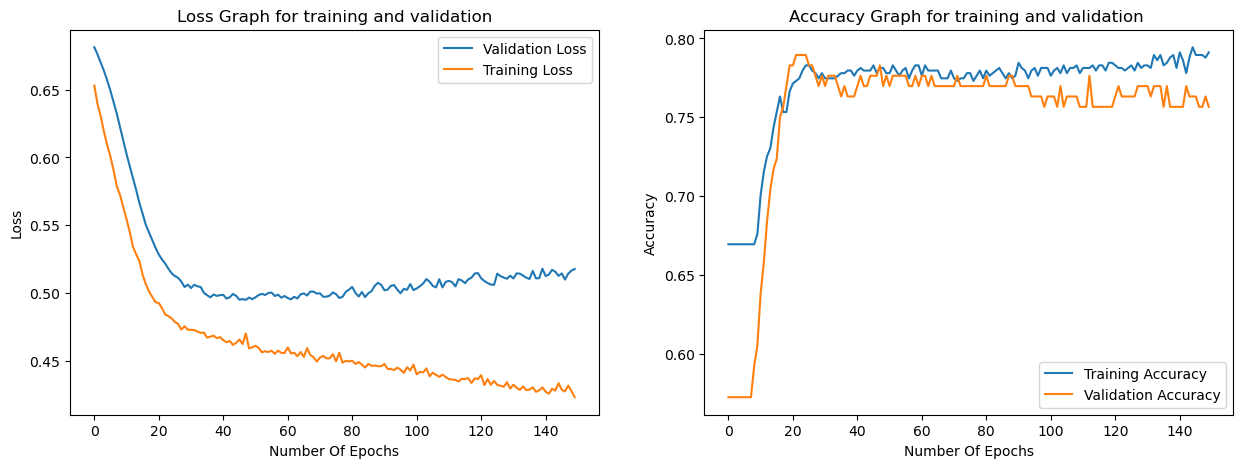

In [21]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc) 

## Part 2

### Dropout Tuning

### Tuning the model with dropout probability 0.1

In [22]:
dropout_prob = 0.1
model = NeuralNetwork(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = training(X_train,y_train,X_test,y_test,150,15)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.5859, Train Acc: 0.6743, Val Loss: 0.6420, Val Acc: 0.5789
Epoch [20/150], Train Loss: 0.5069, Train Acc: 0.7484, Val Loss: 0.5624, Val Acc: 0.7171
Epoch [30/150], Train Loss: 0.4858, Train Acc: 0.7697, Val Loss: 0.5217, Val Acc: 0.7566
Epoch [40/150], Train Loss: 0.4783, Train Acc: 0.7714, Val Loss: 0.5131, Val Acc: 0.7632
Epoch [50/150], Train Loss: 0.4761, Train Acc: 0.7747, Val Loss: 0.5142, Val Acc: 0.7632
Epoch [60/150], Train Loss: 0.4640, Train Acc: 0.7845, Val Loss: 0.5063, Val Acc: 0.7632
Epoch [70/150], Train Loss: 0.4597, Train Acc: 0.7747, Va

In [23]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
Dropout1_loss, Dropout1_acc = final_test_loss, final_test_acc

Test Loss: 0.5150, Test Acc: 0.7434


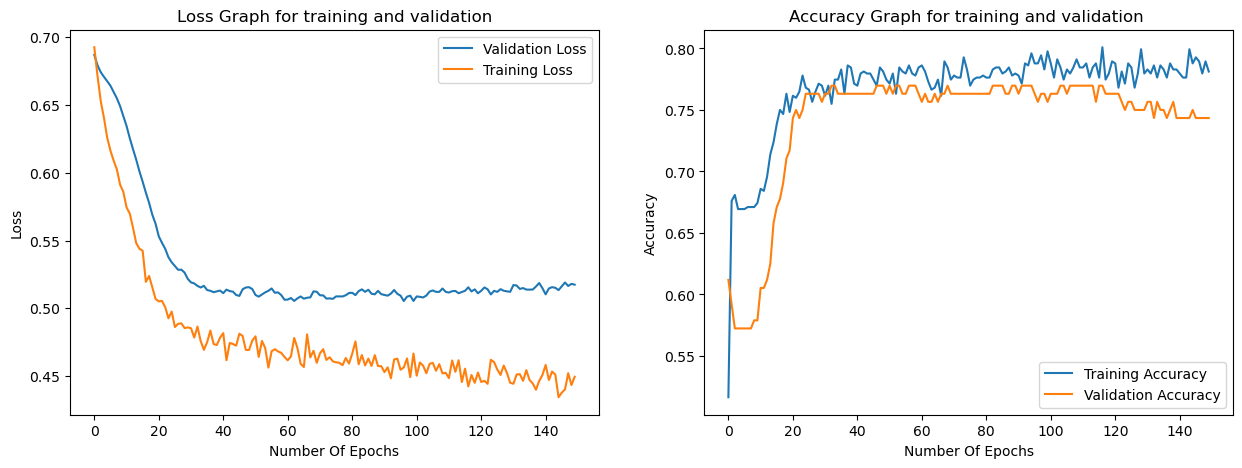

In [24]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

### Tuning the model with dropout probability 0.2

In [25]:
dropout_prob = 0.2
model = NeuralNetwork(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = training(X_train,y_train,X_test,y_test,150,15)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.5720, Train Acc: 0.6678, Val Loss: 0.6241, Val Acc: 0.5855
Epoch [20/150], Train Loss: 0.5181, Train Acc: 0.7467, Val Loss: 0.5601, Val Acc: 0.7237
Epoch [30/150], Train Loss: 0.4987, Train Acc: 0.7681, Val Loss: 0.5229, Val Acc: 0.7566
Epoch [40/150], Train Loss: 0.5058, Train Acc: 0.7681, Val Loss: 0.5095, Val Acc: 0.7763
Epoch [50/150], Train Loss: 0.4830, Train Acc: 0.7780, Val Loss: 0.5067, Val Acc: 0.7763
Epoch [60/150], Train Loss: 0.4762, Train Acc: 0.7582, Val Loss: 0.5078, Val Acc: 0.7697
Epoch [70/150], Train Loss: 0.4766, Train Acc: 0.7648, Va

In [26]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
Dropout2_loss, Dropout2_acc = final_test_loss, final_test_acc

Test Loss: 0.5164, Test Acc: 0.7566


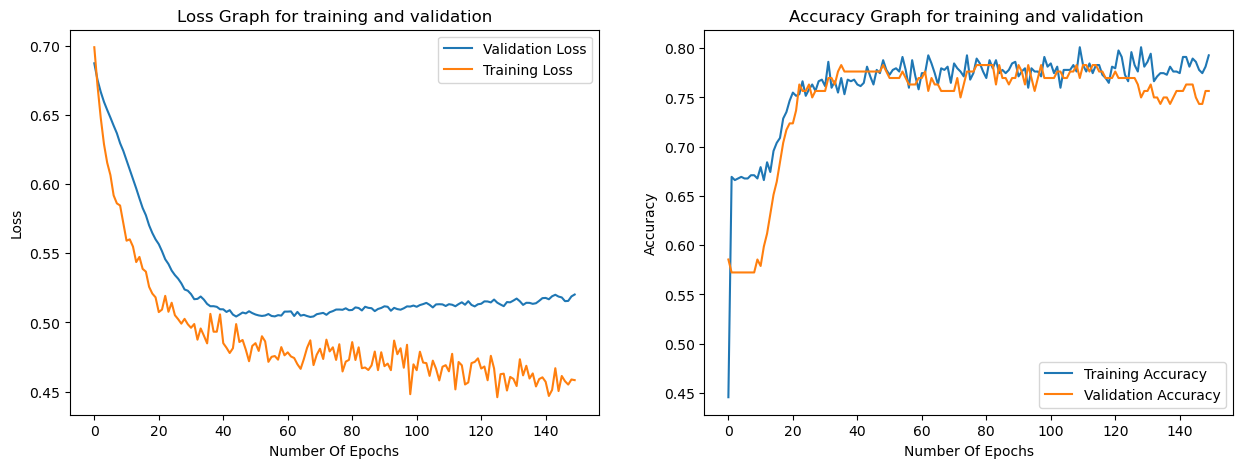

In [27]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

### Tuning the model with dropout probability 0.3

In [28]:
dropout_prob = 0.3
model = NeuralNetwork(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = training(X_train,y_train,X_test,y_test,150,15)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.5570, Train Acc: 0.7007, Val Loss: 0.6031, Val Acc: 0.6382
Epoch [20/150], Train Loss: 0.5175, Train Acc: 0.7648, Val Loss: 0.5306, Val Acc: 0.7763
Epoch [30/150], Train Loss: 0.4928, Train Acc: 0.7747, Val Loss: 0.5107, Val Acc: 0.7763
Epoch [40/150], Train Loss: 0.4948, Train Acc: 0.7730, Val Loss: 0.5041, Val Acc: 0.7763
Epoch [50/150], Train Loss: 0.4770, Train Acc: 0.7911, Val Loss: 0.5022, Val Acc: 0.7829
Epoch [60/150], Train Loss: 0.4809, Train Acc: 0.7681, Val Loss: 0.5055, Val Acc: 0.7829
Epoch [70/150], Train Loss: 0.4697, Train Acc: 0.7730, Va

In [29]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
Dropout3_loss, Dropout3_acc = final_test_loss, final_test_acc

Test Loss: 0.5055, Test Acc: 0.7566


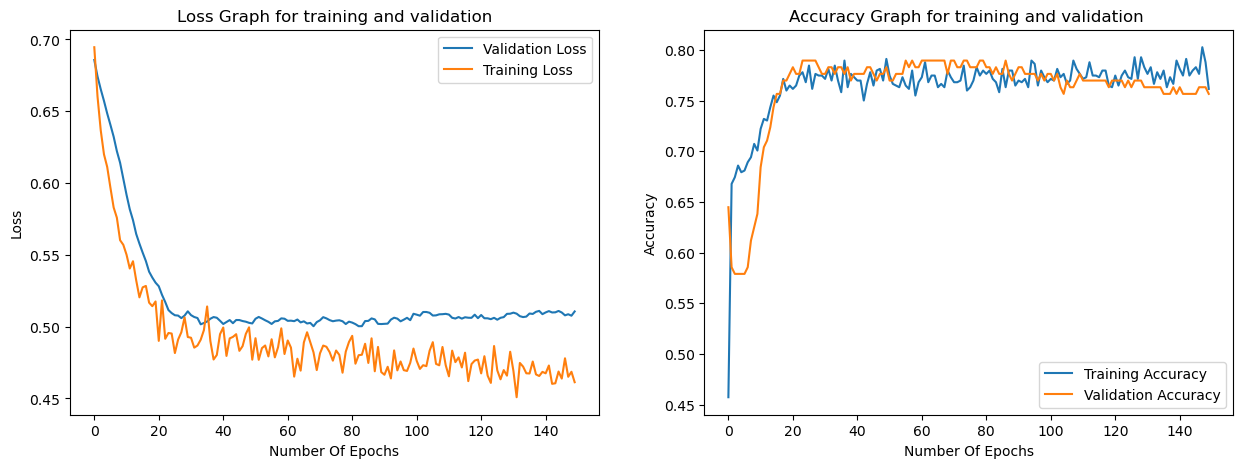

In [30]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

### Optimizer tuning

### Changing the Optimizer to the Adam and training the model

In [31]:
dropout_prob = 0
model = NeuralNetwork(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = training(X_train,y_train,X_test,y_test,optimizer='Adam')

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.4402, Train Acc: 0.7977, Val Loss: 0.5425, Val Acc: 0.7171
Epoch [20/150], Train Loss: 0.3827, Train Acc: 0.8207, Val Loss: 0.5638, Val Acc: 0.7171
Epoch [30/150], Train Loss: 0.3098, Train Acc: 0.8553, Val Loss: 0.6532, Val Acc: 0.6579
Epoch [40/150], Train Loss: 0.2797, Train Acc: 0.8701, Val Loss: 0.8628, Val Acc: 0.6711
Epoch [50/150], Train Loss: 0.2414, Train Acc: 0.8783, Val Loss: 1.2602, Val Acc: 0.7105
Epoch [60/150], Train Loss: 0.1206, Train Acc: 0.9441, Val Loss: 2.0176, Val Acc: 0.6645
Epoch [70/150], Train Loss: 0.1667, Train Acc: 0.9457, Val Lo

In [32]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
Optimizer1_loss, Optimizer1_acc = final_test_loss, final_test_acc

Test Loss: 4.0821, Test Acc: 0.6645


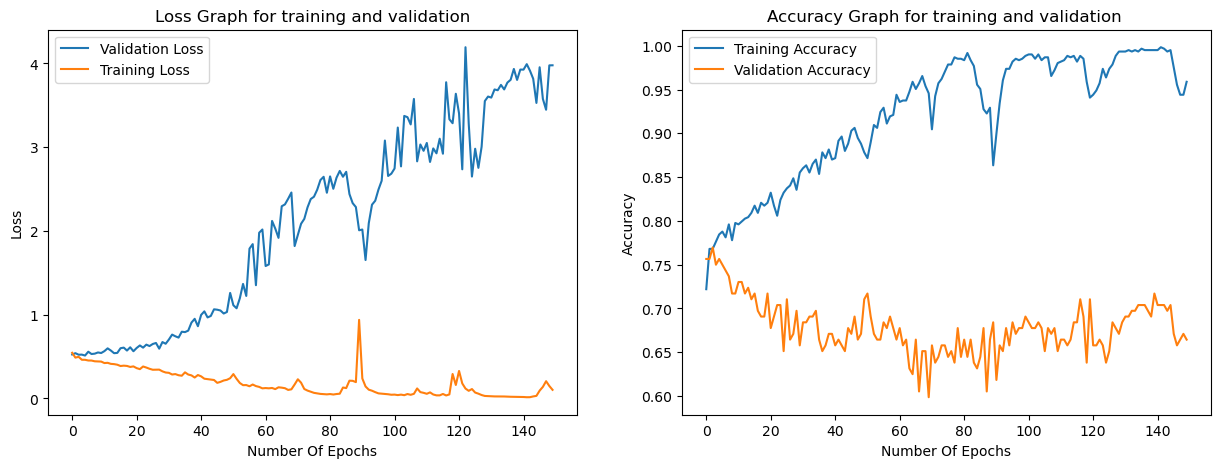

In [33]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

### Changing the Optimizer to the RMSprop and training the model

In [34]:
dropout_prob = 0
model = NeuralNetwork(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = training(X_train,y_train,X_test,y_test,optimizer='RMSprop')

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.4291, Train Acc: 0.7812, Val Loss: 0.5350, Val Acc: 0.7566
Epoch [20/150], Train Loss: 0.3673, Train Acc: 0.8158, Val Loss: 0.5640, Val Acc: 0.7303
Epoch [30/150], Train Loss: 0.3191, Train Acc: 0.8421, Val Loss: 0.7805, Val Acc: 0.7237
Epoch [40/150], Train Loss: 0.2603, Train Acc: 0.8651, Val Loss: 1.0959, Val Acc: 0.6842
Epoch [50/150], Train Loss: 0.2065, Train Acc: 0.9013, Val Loss: 1.1382, Val Acc: 0.6645
Epoch [60/150], Train Loss: 0.1722, Train Acc: 0.9178, Val Loss: 1.0966, Val Acc: 0.6842
Epoch [70/150], Train Loss: 0.1735, Train Acc: 0.9293, Val Lo

In [35]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
Optimizer2_loss, Optimizer2_acc = final_test_loss, final_test_acc

Test Loss: 4.3999, Test Acc: 0.6776


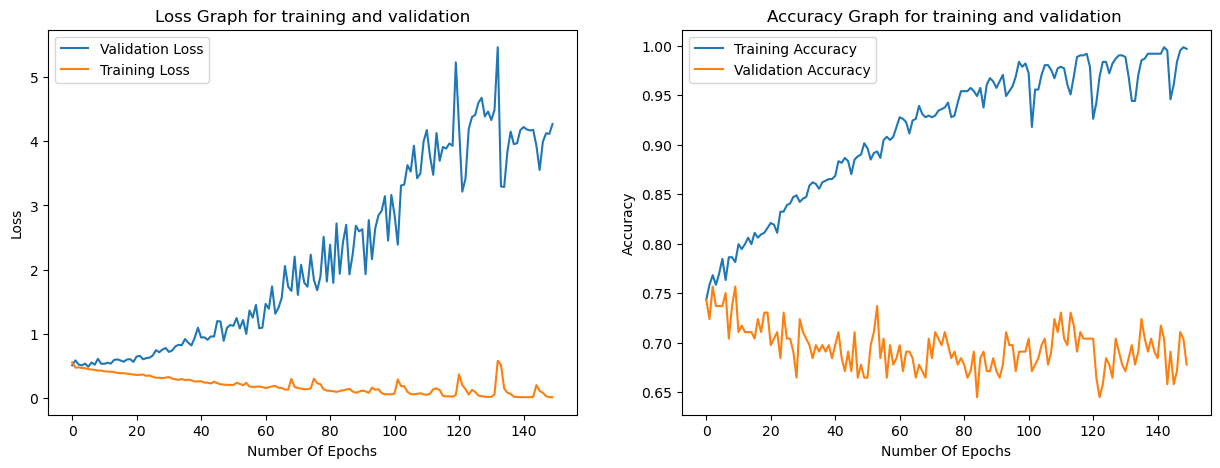

In [36]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

### Changing the Optimizer to the Adagrad and training the model

In [37]:
dropout_prob = 0
model = NeuralNetwork(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = training(X_train,y_train,X_test,y_test,optimizer='Adagrad')

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.4515, Train Acc: 0.7862, Val Loss: 0.5113, Val Acc: 0.7763
Epoch [20/150], Train Loss: 0.4470, Train Acc: 0.7895, Val Loss: 0.5196, Val Acc: 0.7763
Epoch [30/150], Train Loss: 0.4399, Train Acc: 0.7862, Val Loss: 0.5230, Val Acc: 0.7566
Epoch [40/150], Train Loss: 0.4263, Train Acc: 0.7895, Val Loss: 0.5261, Val Acc: 0.7500
Epoch [50/150], Train Loss: 0.4208, Train Acc: 0.7878, Val Loss: 0.5362, Val Acc: 0.7566
Epoch [60/150], Train Loss: 0.4205, Train Acc: 0.7911, Val Loss: 0.5354, Val Acc: 0.7500
Epoch [70/150], Train Loss: 0.4140, Train Acc: 0.7961, Val Lo

In [38]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
Optimizer3_loss, Optimizer3_acc = final_test_loss, final_test_acc

Test Loss: 0.5555, Test Acc: 0.7368


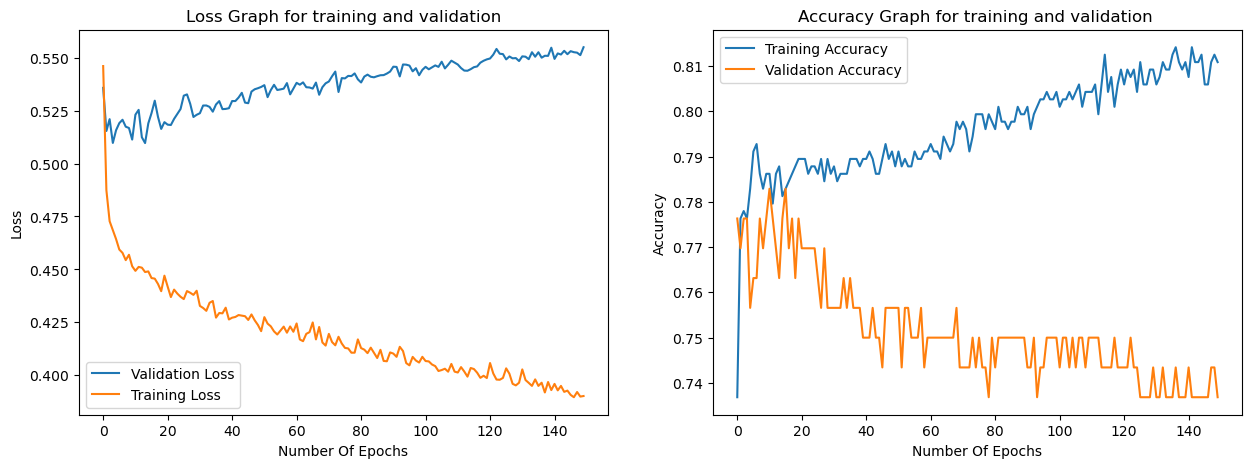

In [39]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

### Activation Function tuning

### Tuning the Neural Network with LeakyReLU Activation function

In [40]:
class LeakyReLU_Network(nn.Module):
    def __init__(self,dropout):
        super(LeakyReLU_Network, self).__init__()
        self.flatten = nn.Flatten()
        self.LeakyReLU_Network_stack = nn.Sequential(
        nn.Linear(7, 64),
        nn.LeakyReLU(),
        nn.Dropout(p=dropout),
        nn.Linear(64, 32),
        nn.LeakyReLU(),
        nn.Dropout(p=dropout),
        nn.Linear(32, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.LeakyReLU_Network_stack(x)
        return logits
dropout_prob = 0
model = LeakyReLU_Network(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = training(X_train,y_train,X_test,y_test,optimizer='SGD')


LeakyReLU_Network(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (LeakyReLU_Network_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Dropout(p=0, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.5793, Train Acc: 0.6859, Val Loss: 0.6383, Val Acc: 0.5987
Epoch [20/150], Train Loss: 0.5024, Train Acc: 0.7582, Val Loss: 0.5680, Val Acc: 0.7434
Epoch [30/150], Train Loss: 0.4660, Train Acc: 0.7862, Val Loss: 0.5387, Val Acc: 0.7763
Epoch [40/150], Train Loss: 0.4574, Train Acc: 0.7714, Val Loss: 0.5333, Val Acc: 0.7632
Epoch [50/150], Train Loss: 0.4515, Train Acc: 0.7796, Val Loss: 0.5376, Val Acc: 0.7566
Epoch [60/150], Train Loss: 0.4516, Train Acc: 0.7812, Val Loss: 0.5400, Val Acc: 0.7500
Epo

In [41]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
activationFunction1_loss, ActivationFunction1_acc = final_test_loss, final_test_acc

Test Loss: 0.5534, Test Acc: 0.7237


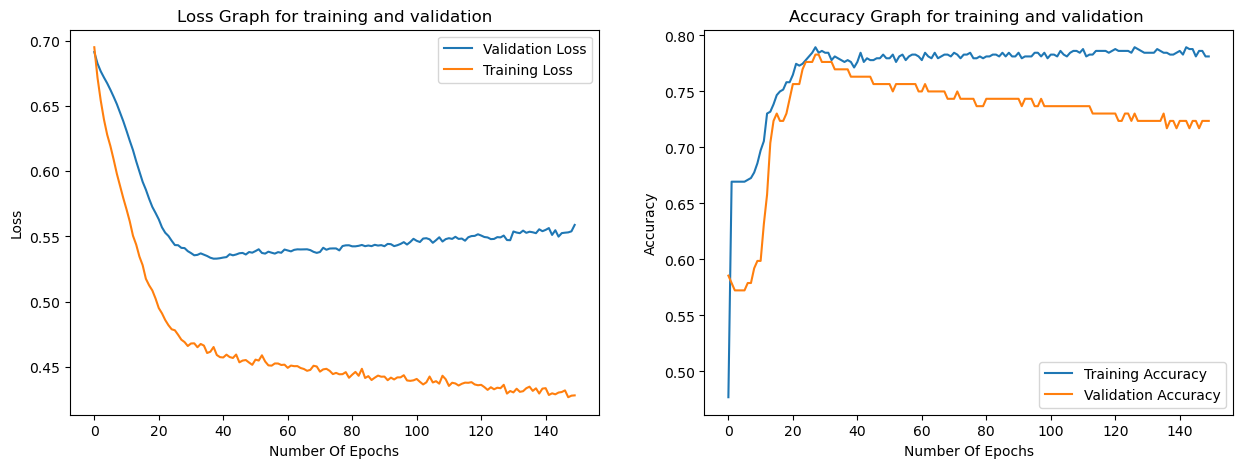

In [42]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

### Tuning the Neural Network with Tanh Activation function

In [43]:
class Tanh_Network(nn.Module):
    def __init__(self,dropout):
        super(Tanh_Network, self).__init__()
        self.flatten = nn.Flatten()
        self.Tanh_stack = nn.Sequential(
        nn.Linear(7, 64),
        nn.Tanh(),
        nn.Dropout(p=dropout),
        nn.Linear(64, 32),
        nn.Tanh(),
        nn.Dropout(p=dropout),
        nn.Linear(32, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.Tanh_stack(x)
        return logits
dropout_prob = 0
model = Tanh_Network(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = training(X_train,y_train,X_test,y_test,optimizer='SGD')


Tanh_Network(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Tanh_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): Tanh()
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Tanh()
    (5): Dropout(p=0, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.4908, Train Acc: 0.7697, Val Loss: 0.5082, Val Acc: 0.7763
Epoch [20/150], Train Loss: 0.4668, Train Acc: 0.7829, Val Loss: 0.4910, Val Acc: 0.7961
Epoch [30/150], Train Loss: 0.4680, Train Acc: 0.7763, Val Loss: 0.4905, Val Acc: 0.7895
Epoch [40/150], Train Loss: 0.4657, Train Acc: 0.7730, Val Loss: 0.4939, Val Acc: 0.7829
Epoch [50/150], Train Loss: 0.4593, Train Acc: 0.7796, Val Loss: 0.4960, Val Acc: 0.7829
Epoch [60/150], Train Loss: 0.4585, Train Acc: 0.7780, Val Loss: 0.4980, Val Acc: 0.7829
Epoch [70/150], Train Loss: 0.4607, Train Acc: 0.7845, Val Loss: 0.49

In [44]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
activationFunction2_loss, ActivationFunction2_acc = final_test_loss, final_test_acc

Test Loss: 0.4998, Test Acc: 0.7697


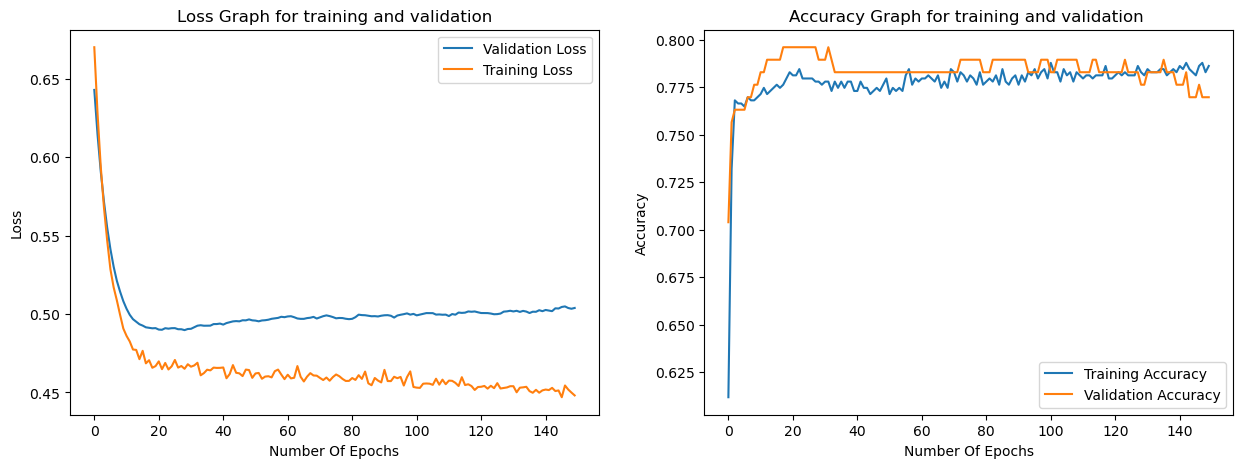

In [45]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

### Tuning the Neural Network with RReLU Activation function

In [46]:
class RReLU_Network(nn.Module):
    def __init__(self,dropout):
        super(RReLU_Network, self).__init__()
        self.flatten = nn.Flatten()
        self.RReLU_stack = nn.Sequential(
        nn.Linear(7, 64),
        nn.RReLU(),
        nn.Dropout(p=dropout),
        nn.Linear(64, 32),
        nn.RReLU(),
        nn.Dropout(p=dropout),
        nn.Linear(32, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.RReLU_stack(x)
        return logits
dropout_prob = 0
model = RReLU_Network(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = training(X_train,y_train,X_test,y_test,optimizer='SGD')


RReLU_Network(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (RReLU_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): RReLU(lower=0.125, upper=0.3333333333333333)
    (5): Dropout(p=0, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.5276, Train Acc: 0.7401, Val Loss: 0.5788, Val Acc: 0.7105
Epoch [20/150], Train Loss: 0.4833, Train Acc: 0.7829, Val Loss: 0.5261, Val Acc: 0.7632
Epoch [30/150], Train Loss: 0.4679, Train Acc: 0.7862, Val Loss: 0.5115, Val Acc: 0.7829
Epoch [40/150], Train Loss: 0.4651, Train Acc: 0.7812, Val Loss: 0.5091, Val Acc: 0.7697
Epoch [50/150], Train Loss: 0.4613, Train Acc: 0.7812, Val Loss: 0.5093, Val Acc: 0.7632
Epoch [60/150], Train Loss: 0.4624, Train Acc: 0.7812, Val Loss: 0.5128, Val Acc

In [47]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
activationFunction3_loss, ActivationFunction3_acc = final_test_loss, final_test_acc

Test Loss: 0.5238, Test Acc: 0.7368


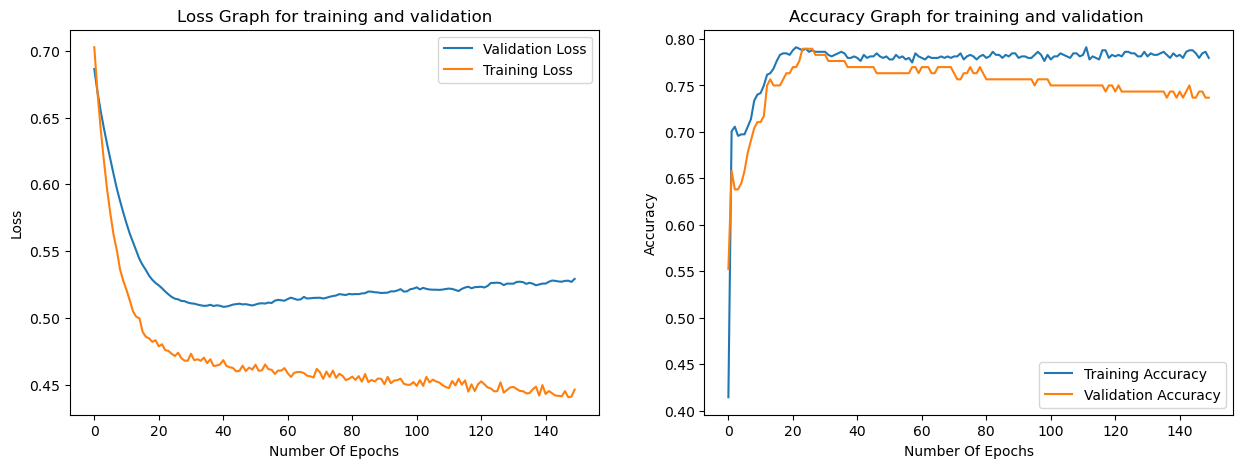

In [48]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

### Initializer tuning

### Tuning the model with xavier initializer

In [49]:
class xavier_Network(nn.Module):
    def __init__(self,dropout):
        super(xavier_Network, self).__init__()
        self.flatten = nn.Flatten()
        self.xavier_Network_stack = nn.Sequential(
        nn.Linear(7, 64),
        nn.RReLU(),
        nn.Dropout(p=dropout),
        nn.Linear(64, 32),
        nn.RReLU(),
        nn.Dropout(p=dropout),
        nn.Linear(32, 1),
        nn.Sigmoid() 
        )
        for module in self.xavier_Network_stack.children():
            if isinstance(module, nn.Linear):
                init.xavier_uniform_(module.weight)
                
    def forward(self, x):
        x = self.flatten(x)
        logits = self.xavier_Network_stack(x)
        return logits

dropout_prob = 0
model = xavier_Network(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = training(X_train,y_train,X_test,y_test,optimizer='SGD')

xavier_Network(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (xavier_Network_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): RReLU(lower=0.125, upper=0.3333333333333333)
    (5): Dropout(p=0, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.4948, Train Acc: 0.7730, Val Loss: 0.5463, Val Acc: 0.7697
Epoch [20/150], Train Loss: 0.4721, Train Acc: 0.7780, Val Loss: 0.5160, Val Acc: 0.7763
Epoch [30/150], Train Loss: 0.4617, Train Acc: 0.7796, Val Loss: 0.5129, Val Acc: 0.7763
Epoch [40/150], Train Loss: 0.4571, Train Acc: 0.7796, Val Loss: 0.5109, Val Acc: 0.7763
Epoch [50/150], Train Loss: 0.4512, Train Acc: 0.7862, Val Loss: 0.5115, Val Acc: 0.7697
Epoch [60/150], Train Loss: 0.4504, Train Acc: 0.7862, Val Loss: 0.512

In [50]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
Initializer1_loss, Initializer1_acc = final_test_loss, final_test_acc

Test Loss: 0.5282, Test Acc: 0.7303


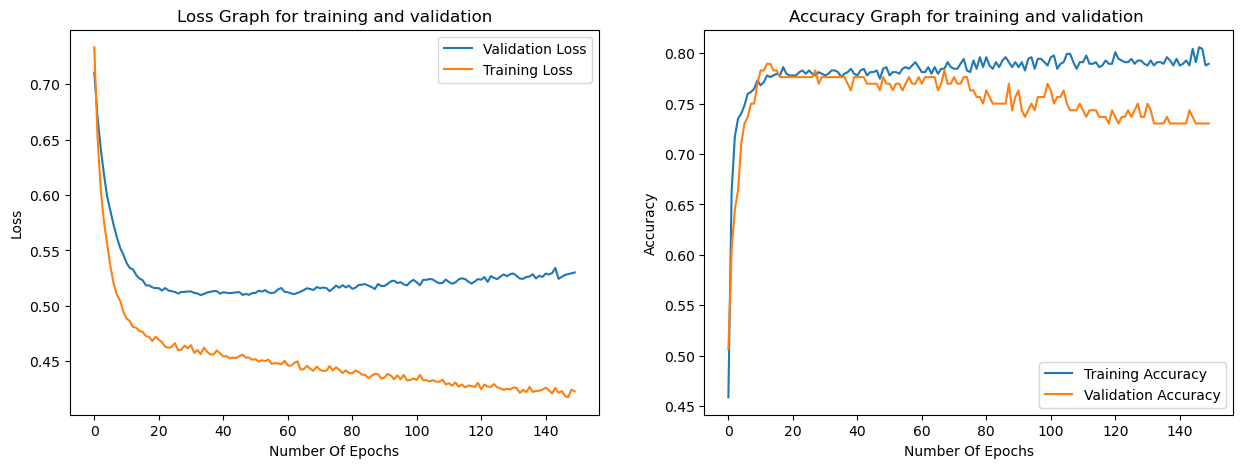

In [51]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

### Tuning the model with Kaiming initializer

In [52]:
class kaiming_Network(nn.Module):
    def __init__(self,dropout):
        super(kaiming_Network, self).__init__()
        self.flatten = nn.Flatten()
        self.kaiming_Network_stack = nn.Sequential(
        nn.Linear(7, 64),
        nn.RReLU(),
        nn.Dropout(p=dropout),
        nn.Linear(64, 32),
        nn.RReLU(),
        nn.Dropout(p=dropout),
        nn.Linear(32, 1),
        nn.Sigmoid() 
        )
        for module in self.kaiming_Network_stack.children():
            if isinstance(module, nn.Linear):
                init.kaiming_uniform_(module.weight)
                
    def forward(self, x):
        x = self.flatten(x)
        logits = self.kaiming_Network_stack(x)
        return logits

dropout_prob = 0
model = kaiming_Network(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = training(X_train,y_train,X_test,y_test,optimizer='SGD')

kaiming_Network(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (kaiming_Network_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): RReLU(lower=0.125, upper=0.3333333333333333)
    (5): Dropout(p=0, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.4765, Train Acc: 0.7730, Val Loss: 0.5258, Val Acc: 0.7368
Epoch [20/150], Train Loss: 0.4612, Train Acc: 0.7780, Val Loss: 0.5403, Val Acc: 0.7368
Epoch [30/150], Train Loss: 0.4615, Train Acc: 0.7895, Val Loss: 0.5172, Val Acc: 0.7368
Epoch [40/150], Train Loss: 0.4393, Train Acc: 0.7977, Val Loss: 0.5340, Val Acc: 0.7303
Epoch [50/150], Train Loss: 0.4404, Train Acc: 0.8026, Val Loss: 0.5294, Val Acc: 0.7303
Epoch [60/150], Train Loss: 0.4351, Train Acc: 0.8092, Val Loss: 0.5

In [53]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
Initializer2_loss, Initializer2_acc = final_test_loss, final_test_acc

Test Loss: 0.5425, Test Acc: 0.7171


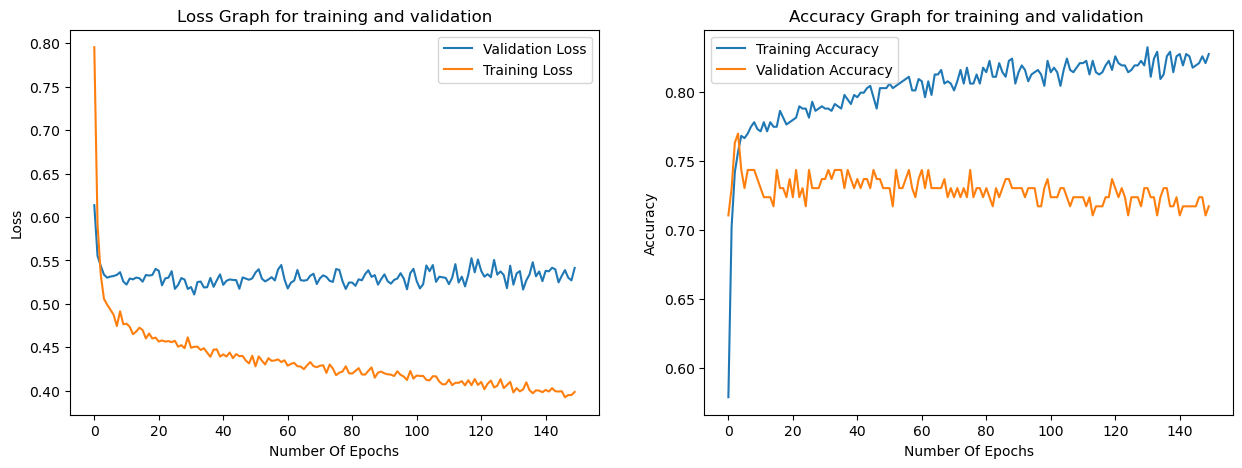

In [54]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

### Tuning the model with xavier_Normal initializer

In [55]:
class xavier_normal_Network(nn.Module):
    def __init__(self,dropout):
        super(xavier_normal_Network, self).__init__()
        self.flatten = nn.Flatten()
        self.xavier_normal_Network_stack = nn.Sequential(
        nn.Linear(7, 64),
        nn.RReLU(),
        nn.Dropout(p=dropout),
        nn.Linear(64, 32),
        nn.RReLU(),
        nn.Dropout(p=dropout),
        nn.Linear(32, 1),
        nn.Sigmoid() 
        )
        for module in self.xavier_normal_Network_stack.children():
            if isinstance(module, nn.Linear):
                init.xavier_normal_(module.weight)
                
    def forward(self, x):
        x = self.flatten(x)
        logits = self.xavier_normal_Network_stack(x)
        return logits

dropout_prob = 0
model = xavier_normal_Network(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = training(X_train,y_train,X_test,y_test,optimizer='SGD')

xavier_normal_Network(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (xavier_normal_Network_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): RReLU(lower=0.125, upper=0.3333333333333333)
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): RReLU(lower=0.125, upper=0.3333333333333333)
    (5): Dropout(p=0, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.4882, Train Acc: 0.7812, Val Loss: 0.5136, Val Acc: 0.7763
Epoch [20/150], Train Loss: 0.4731, Train Acc: 0.7763, Val Loss: 0.5030, Val Acc: 0.7829
Epoch [30/150], Train Loss: 0.4657, Train Acc: 0.7796, Val Loss: 0.5036, Val Acc: 0.7697
Epoch [40/150], Train Loss: 0.4607, Train Acc: 0.7812, Val Loss: 0.5046, Val Acc: 0.7763
Epoch [50/150], Train Loss: 0.4558, Train Acc: 0.7862, Val Loss: 0.5064, Val Acc: 0.7763
Epoch [60/150], Train Loss: 0.4572, Train Acc: 0.7878, V

In [56]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
Initializer3_loss, Initializer3_acc = final_test_loss, final_test_acc

Test Loss: 0.5135, Test Acc: 0.7500


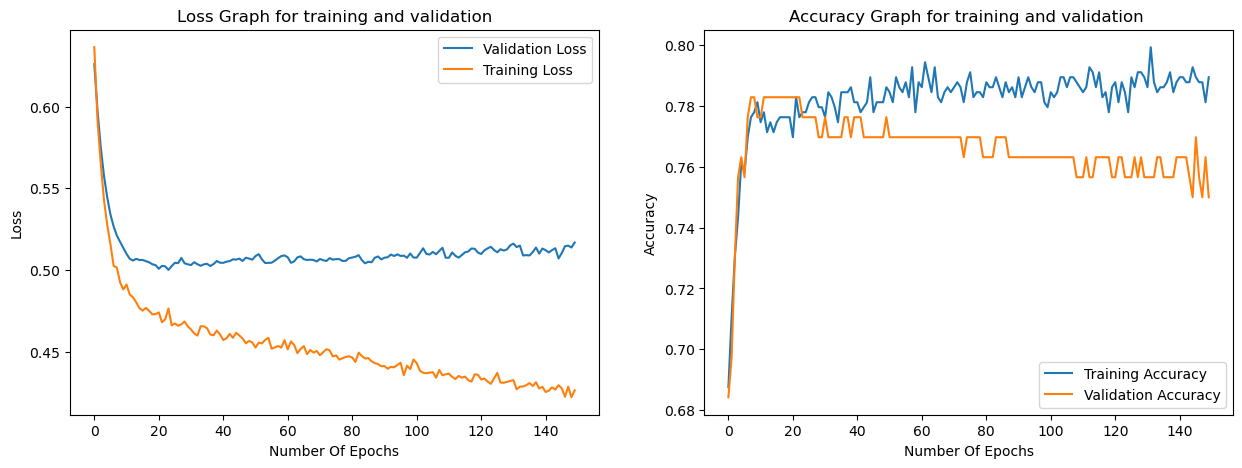

In [57]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

In [58]:
accuracies = {'BaseModel1_acc':BaseModel1_acc,'Dropout1_acc':Dropout1_acc,'Dropout2_acc':Dropout2_acc,'Dropout3_acc':Dropout3_acc,'Optimizer1_acc':Optimizer1_acc,'Optimizer2_acc':Optimizer2_acc,'Optimizer3_acc':Optimizer3_acc,'ActivationFunction1_acc':ActivationFunction1_acc,'ActivationFunction2_acc':ActivationFunction2_acc,'ActivationFunction3_acc':ActivationFunction3_acc,'Initializer1_acc':Initializer1_acc,'Initializer2_acc':Initializer2_acc,'Initializer3_acc':Initializer3_acc}

In [59]:
accuracies

{'BaseModel1_acc': 0.756578947368421,
 'Dropout1_acc': 0.743421052631579,
 'Dropout2_acc': 0.756578947368421,
 'Dropout3_acc': 0.756578947368421,
 'Optimizer1_acc': 0.6644736842105263,
 'Optimizer2_acc': 0.6776315789473685,
 'Optimizer3_acc': 0.7368421052631579,
 'ActivationFunction1_acc': 0.7236842105263158,
 'ActivationFunction2_acc': 0.7697368421052632,
 'ActivationFunction3_acc': 0.7368421052631579,
 'Initializer1_acc': 0.7302631578947368,
 'Initializer2_acc': 0.7171052631578947,
 'Initializer3_acc': 0.75}

#### Assigning the best accuracy from the above models to a variable for further comparisons

In [60]:
base_method = 'base'
base_accuracy = max(accuracies.values())

### Applying additional methods to get better accuracy 

## Early stopping

In [61]:
def early_stop_training(X_train,y_train,X_test,y_test,epochs=150,batch_size=15,optimizer='SGD',patience=3):

    train_data = torch.utils.data.TensorDataset(torch.Tensor(X_train.values), torch.Tensor(y_train.values).unsqueeze(1))
    val_data = torch.utils.data.TensorDataset(torch.Tensor(X_test.values), torch.Tensor(y_test.values).unsqueeze(1))
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)

    lossFunc = torch.nn.BCELoss()
    
    if optimizer == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    elif optimizer == 'RMSprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
    elif optimizer == 'Adagrad':
        optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)
    else:
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    list_validation_loss = []
    list_training_loss = []
    list_train_acc = []
    list_valid_acc = []

    best_loss = float('inf')
    counter = 0
    for epoch in range(epochs):
        train_loss=0
        train_acc=0
        val_loss=0
        val_acc=0
        model.train()
        for b_id,data in enumerate(train_loader):
            features,output = data
            optimizer.zero_grad()
            predictions = model(features)
            loss = lossFunc(predictions, output)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_acc += (predictions.round() == output).float().sum().item()

        # Evaluate the model on the validation data
        model.eval()
        with torch.no_grad():
            for b_id, data in enumerate(val_loader):
                features,output = data
                predictions = model(features)
                loss = lossFunc(predictions, output)
                val_loss += loss.item()
                val_acc += (predictions.round() == output).float().sum().item()

        epoch_train_loss = train_loss/len(train_loader)
        epoch_train_acc = train_acc/len(train_data)
        epoch_valid_loss = val_loss/len(val_loader)
        epoch_valid_acc = val_acc/len(val_data)
        
        list_validation_loss.append(epoch_valid_loss)
        list_training_loss.append(epoch_train_loss)
        list_train_acc.append(epoch_train_acc)
        list_valid_acc.append(epoch_valid_acc)

        print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'
          .format(epoch+1, epochs, epoch_train_loss, epoch_train_acc, epoch_valid_loss, epoch_valid_acc))

        if epoch_valid_loss < best_loss:
            best_loss = epoch_valid_loss
            counter = 0
        else:
            counter += 1
            if counter == patience:
                print('Validation loss did not improve for {} epochs. Stopping early.'.format(patience))
                break

    return list_validation_loss,list_training_loss,list_train_acc,list_valid_acc

In [62]:
dropout_prob = 0
model = NeuralNetwork(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = early_stop_training(X_train,y_train,X_test,y_test,optimizer='Adagrad')

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [1/150], Train Loss: 0.5467, Train Acc: 0.7336, Val Loss: 0.5396, Val Acc: 0.7697
Epoch [2/150], Train Loss: 0.4830, Train Acc: 0.7681, Val Loss: 0.4991, Val Acc: 0.7895
Epoch [3/150], Train Loss: 0.4793, Train Acc: 0.7763, Val Loss: 0.5051, Val Acc: 0.7961
Epoch [4/150], Train Loss: 0.4673, Train Acc: 0.7730, Val Loss: 0.5040, Val Acc: 0.7829
Epoch [5/150], Train Loss: 0.4615, Train Acc: 0.7796, Val Loss: 0.5042, Val Acc: 0.7829
Validation loss did not improve for 3 epochs. Stopping early.


In [63]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
early_stopping_acc = final_test_acc
if final_test_acc>base_accuracy:
    base_accuracy = final_test_acc
    base_method = 'early stopping'
    torch.save(model.state_dict(), 'preethia_vvudhaya_assignment2_part2.pt')

Test Loss: 0.5008, Test Acc: 0.7829


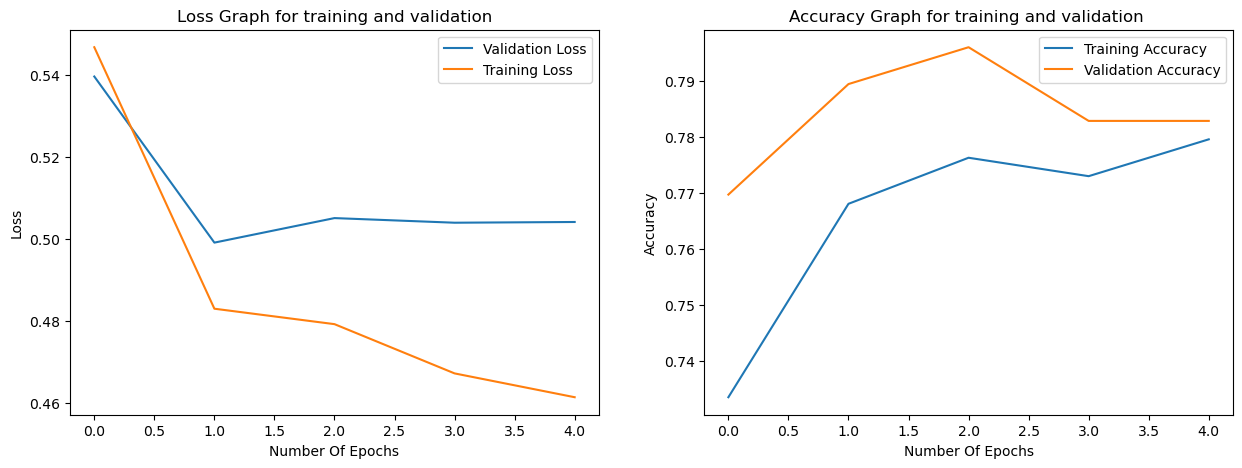

In [64]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

### Learning Rate Scheduler 

In [65]:
def lr_training(X_train, y_train, X_test, y_test, epochs=150, batch_size=15, optimizer='SGD'):
    train_data = torch.utils.data.TensorDataset(torch.Tensor(X_train.values), torch.Tensor(y_train.values).unsqueeze(1))
    val_data = torch.utils.data.TensorDataset(torch.Tensor(X_test.values), torch.Tensor(y_test.values).unsqueeze(1))
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)

    lossFunc = torch.nn.BCELoss()

    if optimizer == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    elif optimizer == 'RMSprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
    elif optimizer == 'Adagrad':
        optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)
    else:
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    
    scheduler = lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

    list_validation_loss = []
    list_training_loss = []
    list_train_acc = []
    list_valid_acc = []

    for epoch in range(epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        model.train()
        for b_id, data in enumerate(train_loader):
            features, output = data
            optimizer.zero_grad()
            predictions = model(features)
            loss = lossFunc(predictions, output)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_acc += (predictions.round() == output).float().sum().item()

        # Evaluate the model on the validation data
        model.eval()
        with torch.no_grad():
            for b_id, data in enumerate(val_loader):
                features, output = data
                predictions = model(features)
                loss = lossFunc(predictions, output)
                val_loss += loss.item()
                val_acc += (predictions.round() == output).float().sum().item()

        epoch_train_loss = train_loss/len(train_loader)
        epoch_train_acc = train_acc/len(train_data)
        epoch_valid_loss = val_loss/len(val_loader)
        epoch_valid_acc = val_acc/len(val_data)

        list_validation_loss.append(epoch_valid_loss)
        list_training_loss.append(epoch_train_loss)
        list_train_acc.append(epoch_train_acc)
        list_valid_acc.append(epoch_valid_acc)
        # Step the learning rate
        scheduler.step()

        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}, LR: {}'
                  .format(epoch+1, epochs, epoch_train_loss, epoch_train_acc, epoch_valid_loss, epoch_valid_acc, scheduler.get_last_lr()))

    return list_validation_loss, list_training_loss, list_train_acc, list_valid_acc


In [66]:
dropout_prob = 0
model = NeuralNetwork(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = lr_training(X_train,y_train,X_test,y_test,optimizer='Adagrad')

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.4589, Train Acc: 0.7845, Val Loss: 0.5126, Val Acc: 0.7763, LR: [0.01]
Epoch [20/150], Train Loss: 0.4532, Train Acc: 0.7862, Val Loss: 0.5110, Val Acc: 0.7697, LR: [0.01]
Epoch [30/150], Train Loss: 0.4417, Train Acc: 0.7878, Val Loss: 0.5156, Val Acc: 0.7763, LR: [0.01]
Epoch [40/150], Train Loss: 0.4309, Train Acc: 0.7944, Val Loss: 0.5221, Val Acc: 0.7566, LR: [0.01]
Epoch [50/150], Train Loss: 0.4241, Train Acc: 0.7961, Val Loss: 0.5248, Val Acc: 0.7434, LR: [0.001]
Epoch [60/150], Train Loss: 0.4228, Train Acc: 0.8010, Val Loss: 0.5239, Val Acc: 0.7434,

In [67]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
lrs_acc = final_test_acc
if final_test_acc>base_accuracy:
    base_accuracy = final_test_acc
    base_method = 'learning rate scheduler'
    torch.save(model.state_dict(), 'preethia_vvudhaya_assignment2_part2.pt')

Test Loss: 0.5234, Test Acc: 0.7434


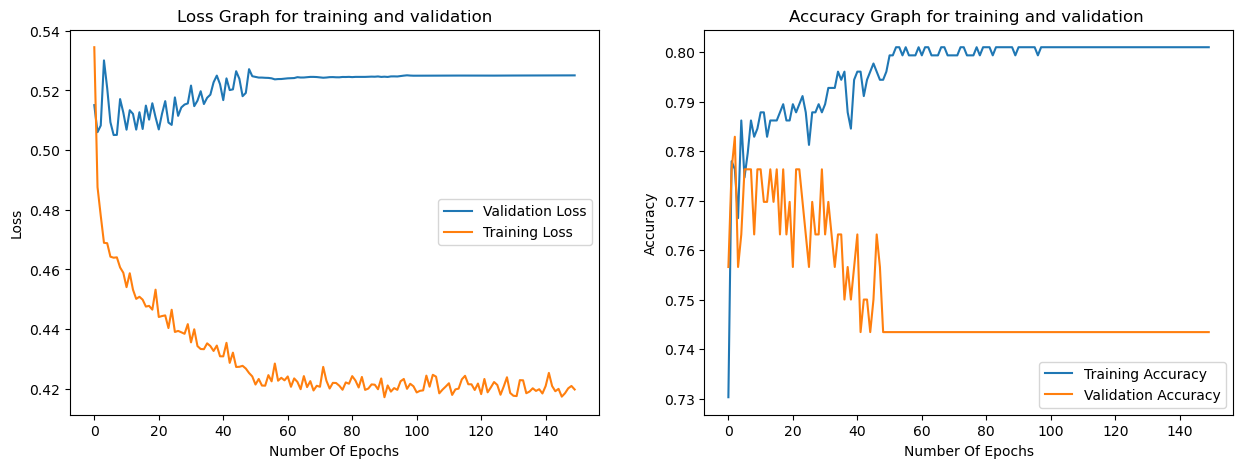

In [68]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

### Batch Normalization

In [69]:
class Batch_Normalization_NeuralNetwork(nn.Module):
    def __init__(self,dropout):
        super(Batch_Normalization_NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(7, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

In [70]:
dropout_prob = 0
model = Batch_Normalization_NeuralNetwork(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = training(X_train,y_train,X_test,y_test,optimizer='Adagrad')

Batch_Normalization_NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0, inplace=False)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0, inplace=False)
    (8): Linear(in_features=32, out_features=1, bias=True)
    (9): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.4512, Train Acc: 0.7747, Val Loss: 0.5383, Val Acc: 0.7368
Epoch [20/150], Train Loss: 0.4516, Train Acc: 0.7796, Val Loss: 0.5530, Val Acc: 0.7368
Epoch [30/150], Train Loss: 0.4339, Train Acc: 0.7928, Val Loss: 0.5637, Val Acc: 0.7303
Epoch [40/150], Train Loss: 0.4482, Train Acc: 0.7911, Val Loss: 0.5667, Val Acc: 0.7303
Epoch [50/150], Train Loss: 0.4352, Train Acc:

In [71]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
bn_acc = final_test_acc
if final_test_acc>base_accuracy:
    base_accuracy = final_test_acc
    base_method = 'Batch Normalization'
    torch.save(model.state_dict(), 'preethia_vvudhaya_assignment2_part2.pt')

Test Loss: 0.5886, Test Acc: 0.6842


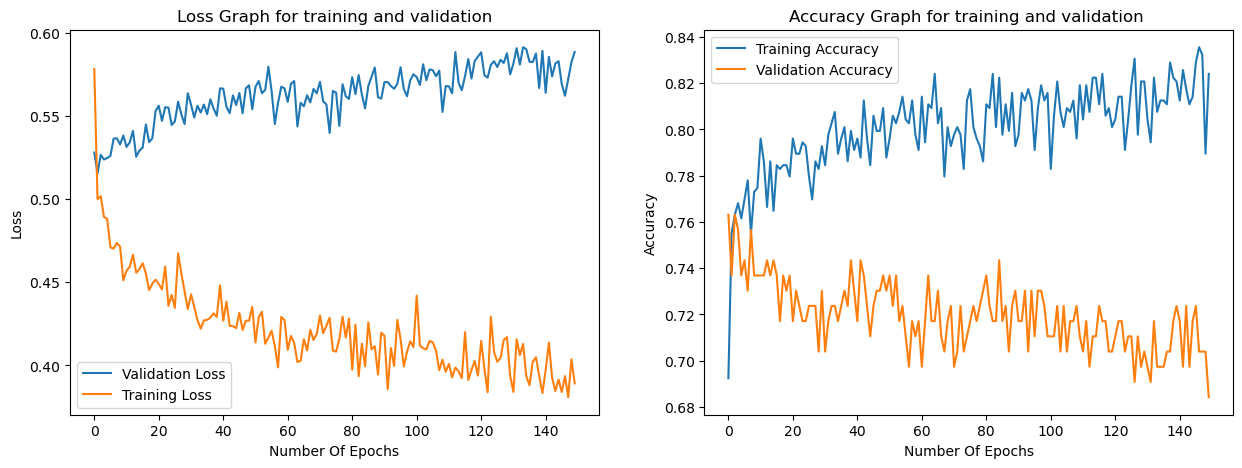

In [72]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

### Gradient Clipping

In [73]:
def gc_training(X_train,y_train,X_test,y_test,epochs=150,batch_size=15,optimizer='SGD', max_norm=None):

    train_data = torch.utils.data.TensorDataset(torch.Tensor(X_train.values), torch.Tensor(y_train.values).unsqueeze(1))
    val_data = torch.utils.data.TensorDataset(torch.Tensor(X_test.values), torch.Tensor(y_test.values).unsqueeze(1))
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)

    lossFunc = torch.nn.BCELoss()
    
    if optimizer == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    elif optimizer == 'RMSprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
    elif optimizer == 'Adagrad':
        optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)
    else:
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    list_validation_loss = []
    list_training_loss = []
    list_train_acc = []
    list_valid_acc = []
    for epoch in range(epochs):
        train_loss=0
        train_acc=0
        val_loss=0
        val_acc=0
        model.train()
        for b_id,data in enumerate(train_loader):
            features,output = data
            optimizer.zero_grad()
            predictions = model(features)
            loss = lossFunc(predictions, output)
            loss.backward()
            if max_norm is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)
            optimizer.step()
            train_loss += loss.item()
            train_acc += (predictions.round() == output).float().sum().item()

        # Evaluate the model on the validation data
        model.eval()
        with torch.no_grad():
            for b_id, data in enumerate(val_loader):
                features,output = data
                predictions = model(features)
                loss = lossFunc(predictions, output)
                val_loss += loss.item()
                val_acc += (predictions.round() == output).float().sum().item()

        epoch_train_loss = train_loss/len(train_loader)
        epoch_train_acc = train_acc/len(train_data)
        epoch_valid_loss = val_loss/len(val_loader)
        epoch_valid_acc = val_acc/len(val_data)
        
        list_validation_loss.append(epoch_valid_loss)
        list_training_loss.append(epoch_train_loss)
        list_train_acc.append(epoch_train_acc)
        list_valid_acc.append(epoch_valid_acc)
        if (epoch+1)%10 ==0:
            print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'
          .format(epoch+1, epochs, epoch_train_loss, epoch_train_acc, epoch_valid_loss, epoch_valid_acc))

    return list_validation_loss,list_training_loss,list_train_acc,list_valid_acc


In [74]:
dropout_prob = 0
model = NeuralNetwork(dropout_prob).to(device)
print(model)

validation_loss,training_loss,train_acc,valid_acc = gc_training(X_train,y_train,X_test,y_test,optimizer='Adagrad')

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
Epoch [10/150], Train Loss: 0.4539, Train Acc: 0.7862, Val Loss: 0.5102, Val Acc: 0.7697
Epoch [20/150], Train Loss: 0.4468, Train Acc: 0.7911, Val Loss: 0.5130, Val Acc: 0.7566
Epoch [30/150], Train Loss: 0.4317, Train Acc: 0.7862, Val Loss: 0.5255, Val Acc: 0.7566
Epoch [40/150], Train Loss: 0.4261, Train Acc: 0.7878, Val Loss: 0.5279, Val Acc: 0.7368
Epoch [50/150], Train Loss: 0.4245, Train Acc: 0.7862, Val Loss: 0.5312, Val Acc: 0.7171
Epoch [60/150], Train Loss: 0.4158, Train Acc: 0.7895, Val Loss: 0.5372, Val Acc: 0.7105
Epoch [70/150], Train Loss: 0.4135, Train Acc: 0.7993, Val Lo

In [75]:
final_test_loss, final_test_acc = testing(X_test,y_test,10)
gc_acc = final_test_acc
if final_test_acc>base_accuracy:
    base_accuracy = final_test_acc
    base_method = 'Gradient clipping'
    torch.save(model.state_dict(), 'preethia_vvudhaya_assignment2_part2.pt')

Test Loss: 0.5550, Test Acc: 0.6908


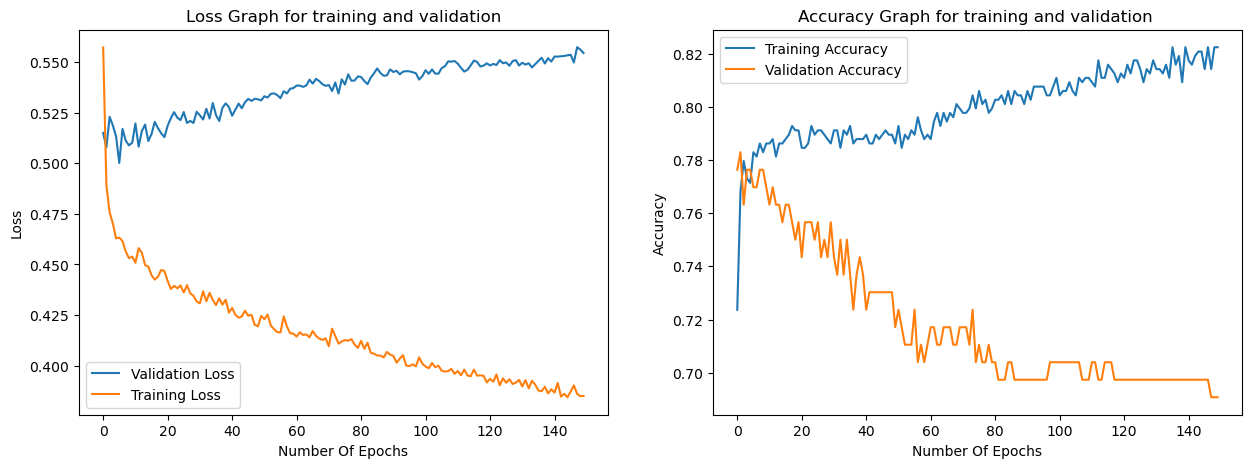

In [76]:
loss_acc_graphs(validation_loss,training_loss,train_acc,valid_acc)

In [77]:

print(f"""the accuracy obtained using various new methods are 
      \nEarly Stopping {early_stopping_acc:.4f}\n
      Learning Rate Scheduler {lrs_acc:.4f}\n
      Batch Normalization {bn_acc:.4f}\n
      Gradient Clipping {gc_acc:.4f}
      """)
      

the accuracy obtained using various new methods are 
      
Early Stopping 0.7829

      Learning Rate Scheduler 0.7434

      Batch Normalization 0.6842

      Gradient Clipping 0.6908
      


In [78]:
print(f"The best accuracy is obtained using the {base_method} and the accuracy is {base_accuracy}")

The best accuracy is obtained using the early stopping and the accuracy is 0.7828947368421053


### REFERENCES

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
https://pytorch.org/docs/stable/nn.html
https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html
https://pytorch.org/docs/stable/optim.html
https://pytorch.org/tutorials/beginner/saving_loading_models.html
https://pytorch.org/ignite/generated/ignite.handlers.early_stopping.EarlyStopping.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
https://pytorch.org/docs/stable/generated/torch.nn.functional.normalize.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://www.tensorflow.org/guide/keras/preprocessing_layer
https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ReduceLROnPlateau.html